In [9]:
import numpy as np
import matplotlib.pyplot as plt

class Environment(object):
    def __init__(self, size, position, goal):
        self.size = size
        self.position = position
        self.state = np.full((size, size), "O")
        self.goal = goal

    def initialize(self):
        # lists to simplify initialization of environment
        self.position = (0,0)
        a = [8,2]
        b = [0,2,3,4]
        c = [6,7,9,10]
        # x y position of current agent
        x = self.position[0]
        y = self.position[1]
        # initialize goal
        self.state[self.goal[0]][self.goal[1]] = "G"
        # initialize agent's current position
        self.state[x][y] = "A"
        # initialize walls
        for i in range(0,11):
            if i not in a:
                self.state[i][5] = "X"
        for i in range(0,11):
            if i in b:
                self.state[5][i] = "X"
        for i in range(0,11):
            if i in c:
                self.state[6][i] = "X"
        return
    
    def move(self, action):
        # 1 represents correct direction while the other values represent the perpendicular directions
        in_bound = [1,2,3]
        out_bound = [1,2]
        #  We will have different weighted probabilities base on the number of cases (2 or 3)
        r_1 = np.random.choice(in_bound, 1, p=[0.8, 0.1, 0.1])
        r_2 = np.random.choice(out_bound, 1, p=[0.9, 0.1])
        min = 0
        max = self.size - 1
        # x y position of current agent
        x = self.position[0]
        y = self.position[1]
        self.state[x][y] = "O"

        # if out of bounds we will put a restriction, else keep next position
        if y - 1 < min:
            left = "X"
        else:
            left = self.state[x][y-1]
        if y + 1 > max :
            right = "X"
        else:
            right = self.state[x][y+1]
        if x+1 > max:
            down = "X"
        else:
            down = self.state[x+1][y]
        if x-1 < min:
            up = "X"
        else:
            up = self.state[x-1][y]

        # Note: logic here is created according to question, possibility to explore only
        # perpendicular position when agent is faulty
        if action == "r" or action =="l":
            # if down and up is not blocked, consider 3 cases
            if down != "X" and up != "X":
                # agent going right direction
                if r_1 == 1:
                    if action == "r":
                        # stay original pos
                        if right == "X":
                            self.state[x][y] = "A"
                        else:
                            self.state[x][y+1] = "A"
                            self.position = (x,y+1)
                    else:
                         # stay original pos
                        if left == "X":
                            self.state[x][y] = "A"
                        else:
                            self.state[x][y-1] = "A"
                            self.position = (x,y-1)
                # up
                elif r_1 == 2:
                    self.state[x-1][y] = "A"
                    self.position = (x-1,y)
                # down
                else:
                    self.state[x+1][y] = "A"
                    self.position = (x+1,y)
            else:
                # if agent move in correct direction
                if r_2 == 1:
                    if action == "r":
                        # stay original pos
                        if right == "X":
                            self.state[x][y] = "A"
                        else:
                            self.state[x][y+1] = "A"
                            self.position = (x,y+1)
                    else:
                         # stay original pos
                        if left == "X":
                            self.state[x][y] = "A"
                        else:
                            self.state[x][y-1] = "A"
                            self.position = (x,y-1)
                else:
                    # if up is not blocked
                    if up != "X":
                        self.state[x-1][y] = "A"
                        self.position = (x-1,y)
                    elif down != "X":
                        self.state[x+1][y] = "A"
                        self.position = (x+1,y)
                    else:
                        self.state[x][y] = "A"

        if action == "u" or action == "d":
            # if left and right is not blocked, consider 3 cases
            if left != "X" and right != "X":
                # agent going right direction
                if r_1 == 1:
                    if action == "d":
                        # stay original pos
                        if down == "X":
                            self.state[x][y] = "A"
                        else:
                            self.state[x+1][y] = "A"
                            self.position = (x+1,y)
                    else:
                         # stay original pos
                        if up == "X":
                            self.state[x][y] = "A"
                        else:
                            self.state[x-1][y] = "A"
                            self.position = (x-1,y)
                # left
                elif r_1 == 2:
                    self.state[x][y-1] = "A"
                    self.position = (x,y-1)
                # right
                else:
                    self.state[x][y+1] = "A"
                    self.position = (x,y+1)
            else:
                # if agent move in correct direction
                if r_2 == 1:
                    if action == "d":
                        # stay original pos
                        if down == "X":
                            self.state[x][y] = "A"
                        else:
                            self.state[x+1][y] = "A"
                            self.position = (x+1,y)
                    else:
                         # stay original pos
                        if up == "X":
                            self.state[x][y] = "A"
                        else:
                            self.state[x-1][y] = "A"
                            self.position = (x-1,y)
                else:
                    # if left is not blocked
                    if left != "X":
                        self.state[x][y-1] = "A"
                        self.position = (x,y-1)
                    elif right != "X":
                        self.state[x][y+1] = "A"
                        self.position = (x,y+1)
                    else:
                        self.state[x][y] = "A"
        return self.position        

    def simulate(self, action):
        result = self.move(action)
        if result == self.goal:
            return (1, result)
        return (0, result)
    
    def draw(self):
        print(self.state)

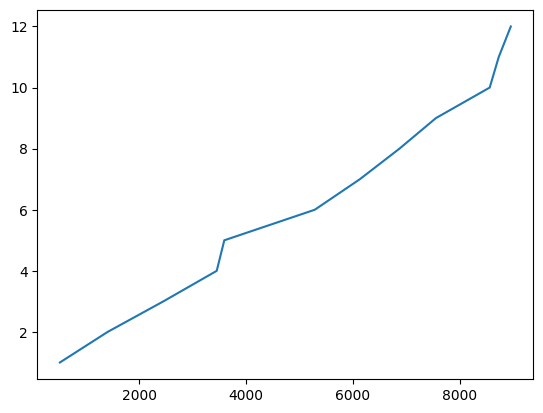

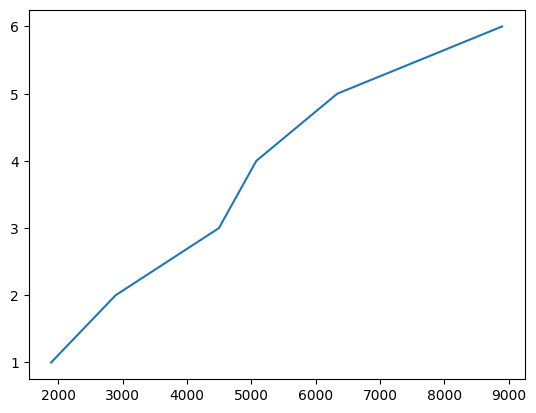

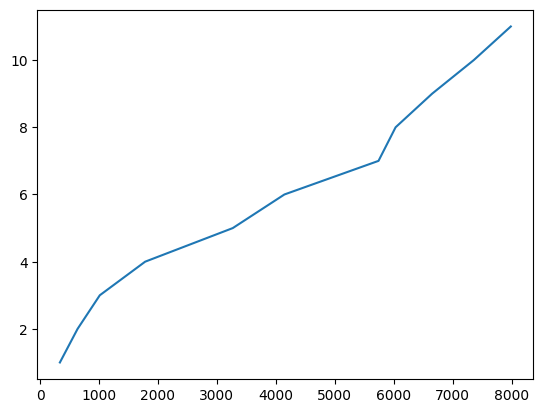

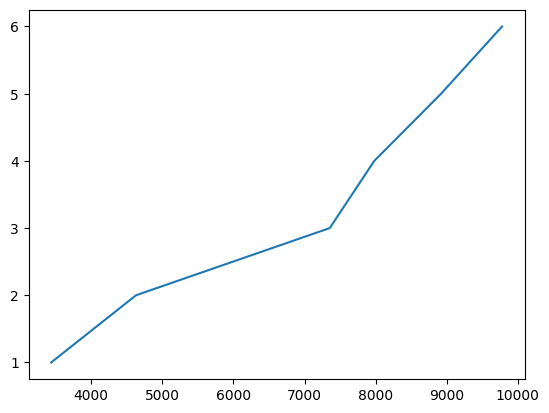

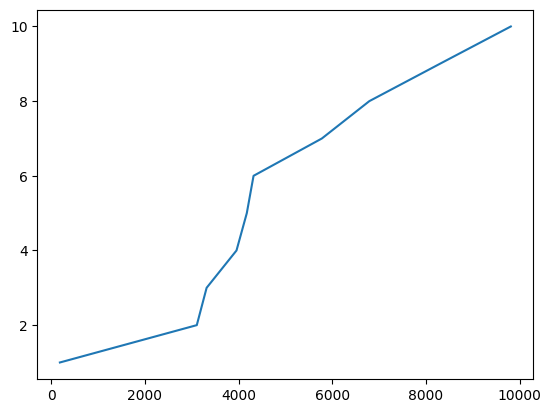

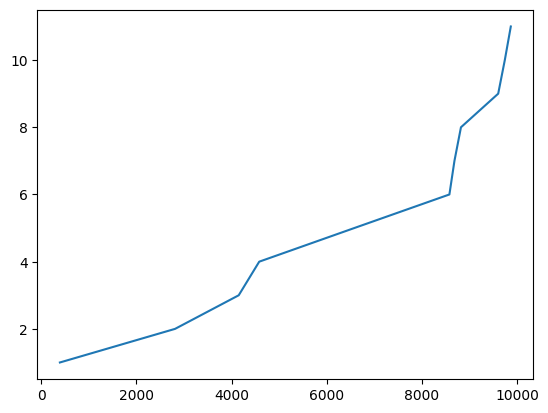

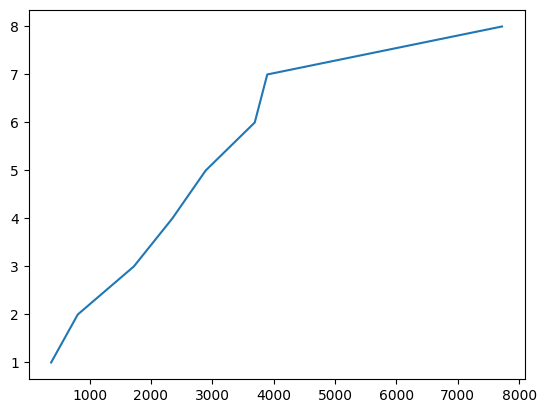

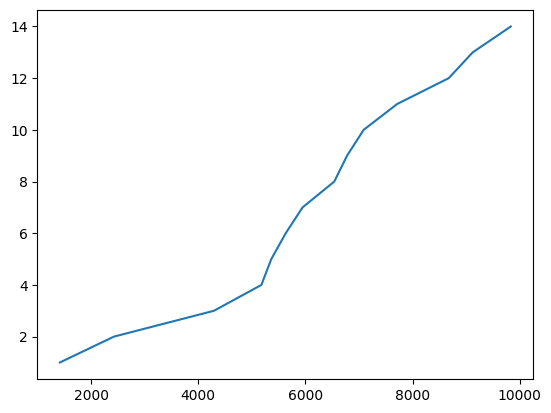

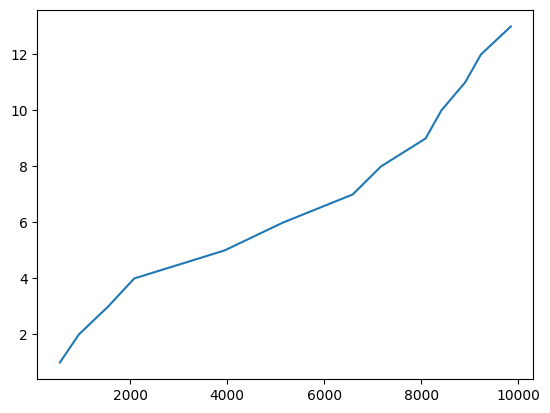

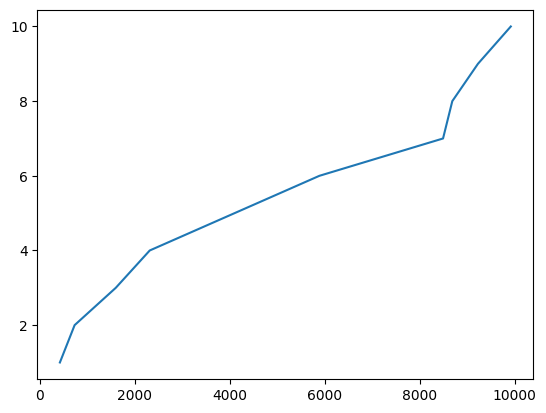

In [10]:
def random_policy(env, episodes, steps_per_episode):
    actions = ["l","d","r","u"]
    while episodes > 0:
        total_steps_per_episode = 0
        cumulative = 0
         # store cumulative steps when agent reaches the goal
        steps = []
        # store cumulative reward when agent reaches the goal
        rewards = []
        env.initialize()
        while total_steps_per_episode < steps_per_episode:
            # probability is equal for every single goal
            random_action = np.random.choice(actions, 1, p=[0.25, 0.25, 0.25, 0.25])
            # if agent reaches the goal
            if env.simulate(random_action) == (1,(10,10)):
                cumulative += 1
                rewards.append(cumulative)
                steps.append(total_steps_per_episode)
                # reset environment
                env.initialize()
            total_steps_per_episode += 1
        plt.plot(steps, rewards)
        plt.show()
        episodes -= 1
    return 
env = Environment(11, (0,0), (10,10))
random_policy(env,10,10000)

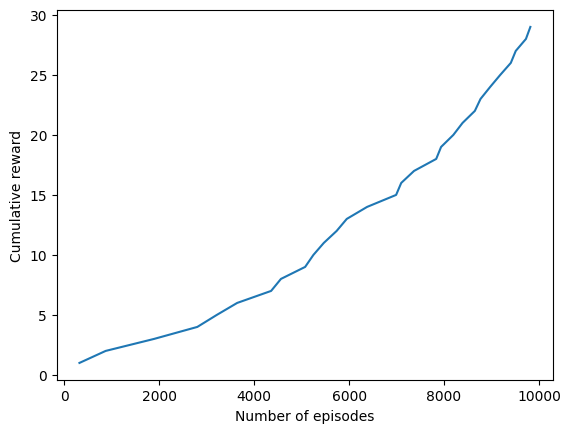

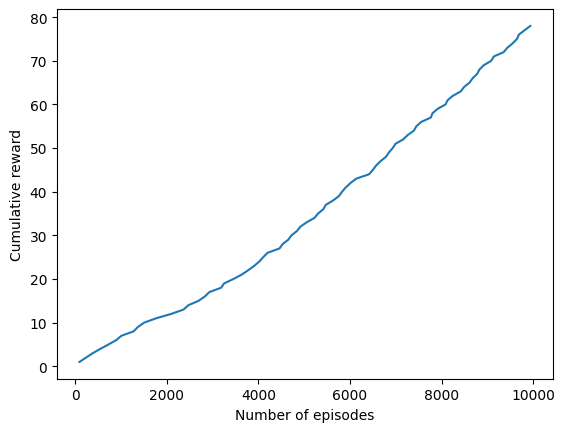

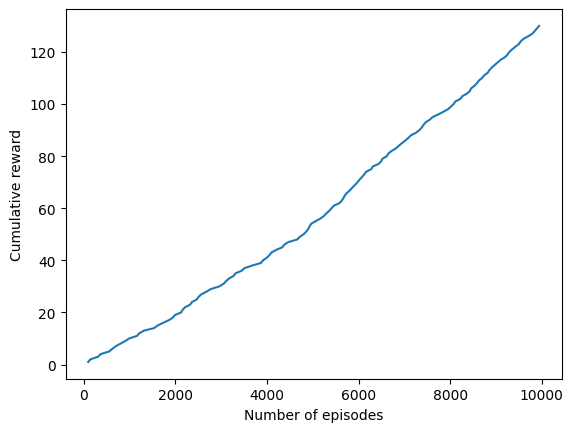

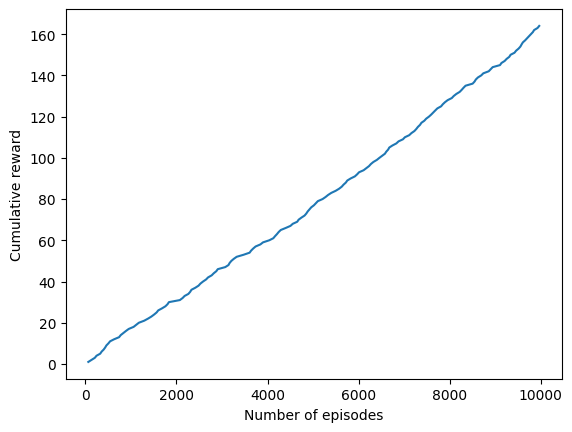

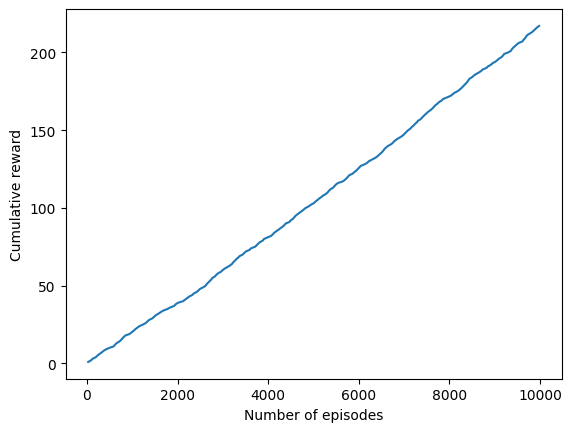

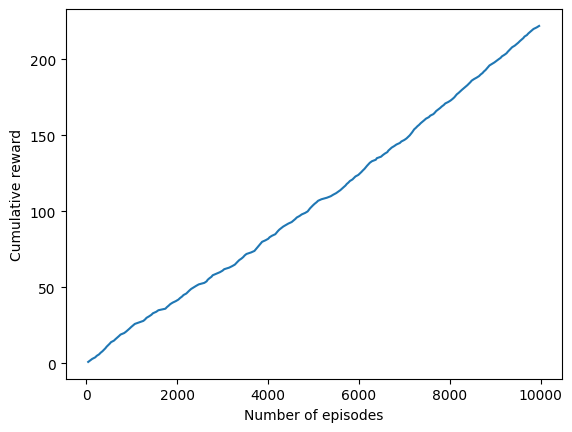

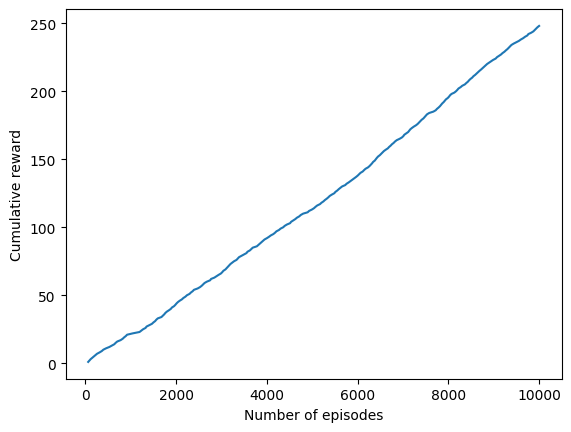

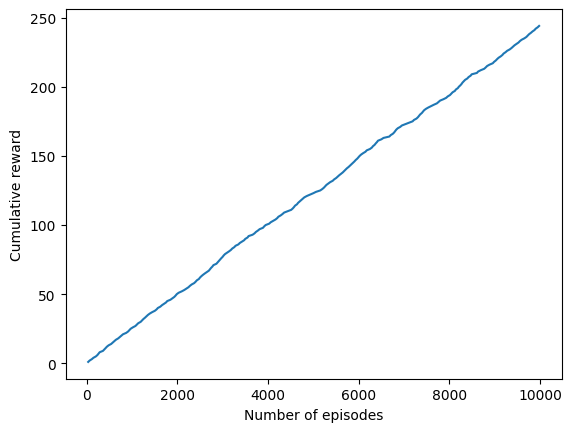

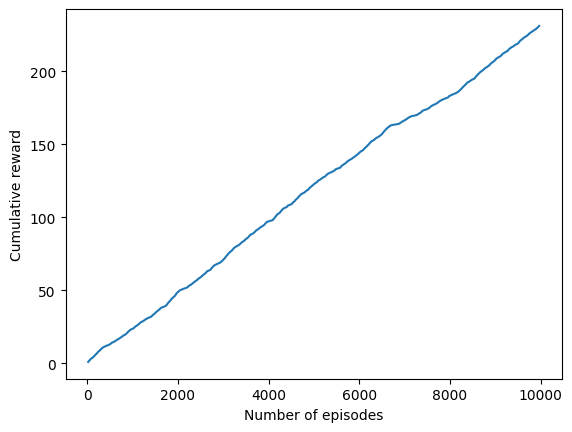

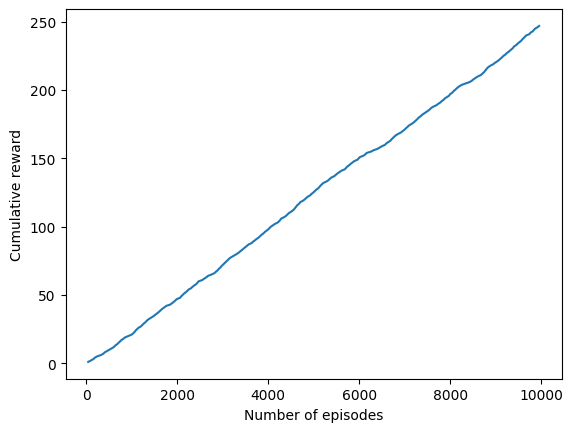

In [11]:
def q_policy(env, epsilon, alpha, gamma, episodes, steps_per_episode):
    actions = ["l","d","r","u"]
    q_table = {}
    # Initializa Q table
    for i in range (0,11):
        for j in range (0,11):
            q_table[(i,j)] = {"l" : 0, "d" : 0, "r" : 0, "u" : 0}

    while episodes > 0:
        steps_so_far = 0
        # store cumulative reward in every step
        cumulative = 0
        # store cumulative reward when agent reaches the goal
        total_rewards = []
        # store cumulative steps when agent reaches the goal
        total_steps = []
        env.initialize()

        while steps_so_far < steps_per_episode:
            current_pos = env.position
            # random probability
            prob = np.random.random()
            # if probability generated is less than epsilon, explore
            if prob <= epsilon:
                action = np.random.choice(actions, 1, p=[0.25, 0.25, 0.25, 0.25])
            # otherwise exploit, Epsilon-Greedy
            else:
                action = max(q_table[current_pos], key=q_table[current_pos].get)
            
            # if agent reaches the goal
            if env.simulate(action) == (1,(10,10)):
                cumulative += 1
                # update q value with reward beings 100
                q_table[current_pos][action[0]] += (alpha * (100 + (gamma * next_state_max_q - q_table[current_pos][action[0]])))
                total_rewards.append(cumulative)
                total_steps.append(steps_so_far)
                # reset environment
                env.initialize()
            else:
                # x,y to store next state pos
                x = env.position[0]
                y = env.position[1]
                # optimal move for next state
                next_state_max_q = q_table[(x,y)][max(q_table[(x,y)])]
                # update q value with reward being -1
                q_table[current_pos][action[0]] += (alpha * (-1 + (gamma * next_state_max_q - q_table[current_pos][action[0]])))
            steps_so_far += 1
            
        plt.plot(total_steps, total_rewards)
        plt.xlabel("Number of episodes")
        plt.ylabel("Cumulative reward")
        plt.show()
        episodes -= 1
    return

env = Environment(11, (0,0), (10,10))
# epsilon = 0.1, learning rate = 0.2, discount rate = 0.9
q_policy(env,0.1,0.2,0.9, 10, 10000)